In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.

In [2]:
df  = pd.read_csv('BIKE DETAILS.csv')
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [3]:
df.shape

(1061, 7)

In [4]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

Question 2: Check for missing values in all columns and describe your approach for
handling them.

In [5]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


Insights: Only the ex_showroom_price column has missing values (435 out of 1061 rows).Since ex_showroom_price is important for estimating fair selling price, we should go for imputaion.

In [7]:
# Impute missing values in 'ex_showroom_price' using the median
median_value = df['ex_showroom_price'].median()
df['ex_showroom_price'].fillna(median_value, inplace=True)

missing_after = df.isnull().sum()
print(missing_after)

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


Now dataset has no missng values

Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.

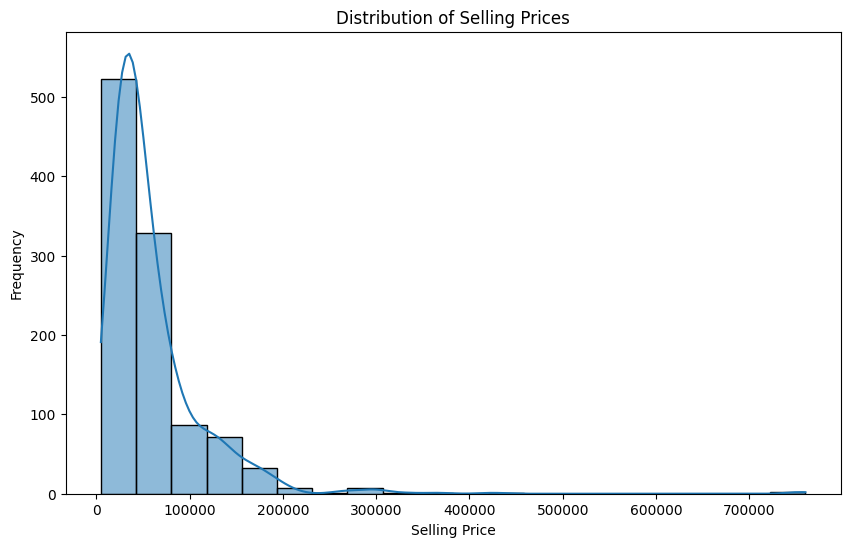

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=20, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

The Selling price distribution is right-skewed -most bikes are sold under 100000 ,while a few high-priced bikes create a long right tail.This shows the dataset is dominated by affordable bikes with some premium ones.

Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.

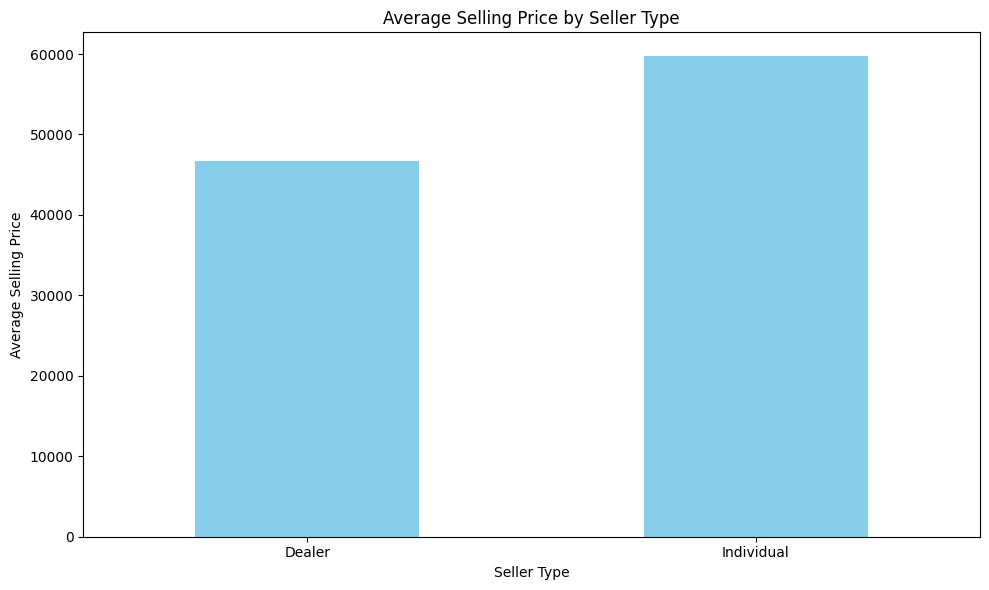

In [9]:
average_prices = df.groupby('seller_type')['selling_price'].mean()


plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='skyblue')

plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

 The bar plot clearly shows the difference in average selling prices among different seller types.

Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.

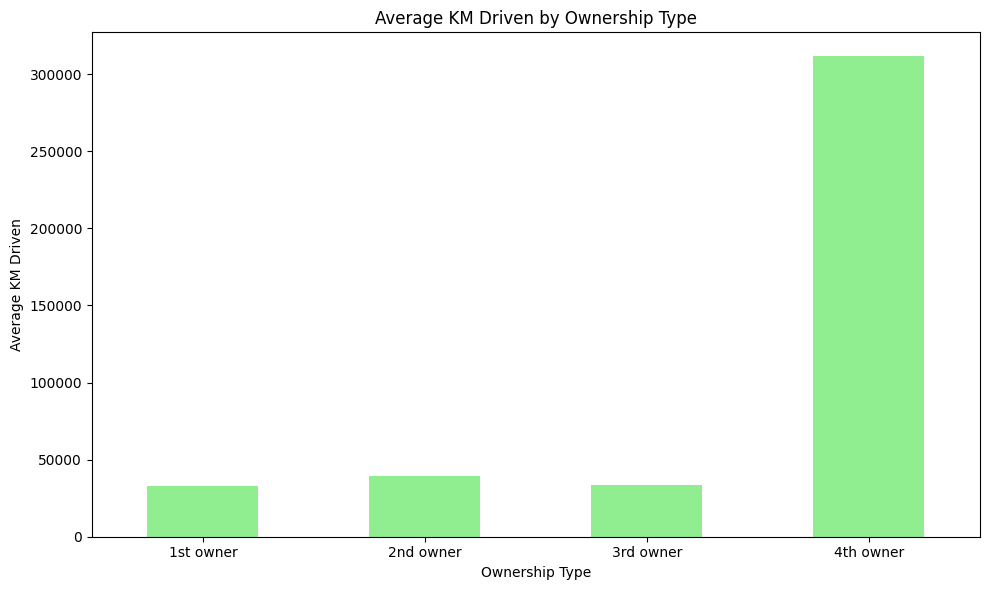

In [10]:
average_km = df.groupby('owner')['km_driven'].mean()

plt.figure(figsize=(10, 6))
average_km.plot(kind='bar', color='lightgreen')

plt.title('Average KM Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average KM Driven')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.


In [11]:


# Summary statistics before removing outliers
before_summary = df['km_driven'].describe()
print("Summary before removing outliers:\n", before_summary, "\n")

# Calculate IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Summary statistics after removing outliers
after_summary = df_no_outliers['km_driven'].describe()
print("Summary after removing outliers:\n", after_summary, "\n")

print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)

Summary before removing outliers:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64 

Summary after removing outliers:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64 

Original shape: (1061, 7)
After removing outliers: (1022, 7)


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.


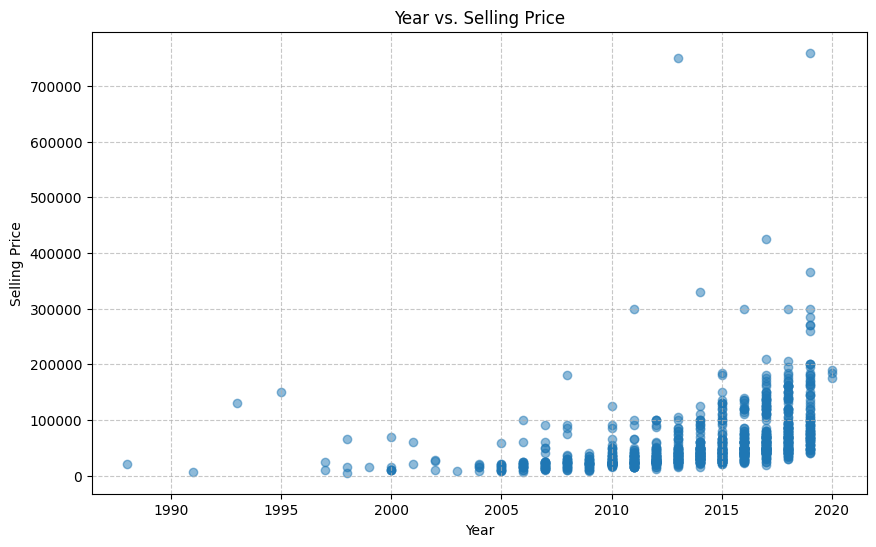

In [10]:

year = df['year']
selling_price = df['selling_price']

plt.figure(figsize=(10, 6))
plt.scatter(year, selling_price, alpha=0.5)

plt.title('Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.


In [11]:
df = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

print(df.head())

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Individual  
0        350           147000.0                       1  
1       5650            75000.0                       1  
2      12000           148114.0                       1  
3      23000            89643.0                       1  
4      21000            75000.0                       1  


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?

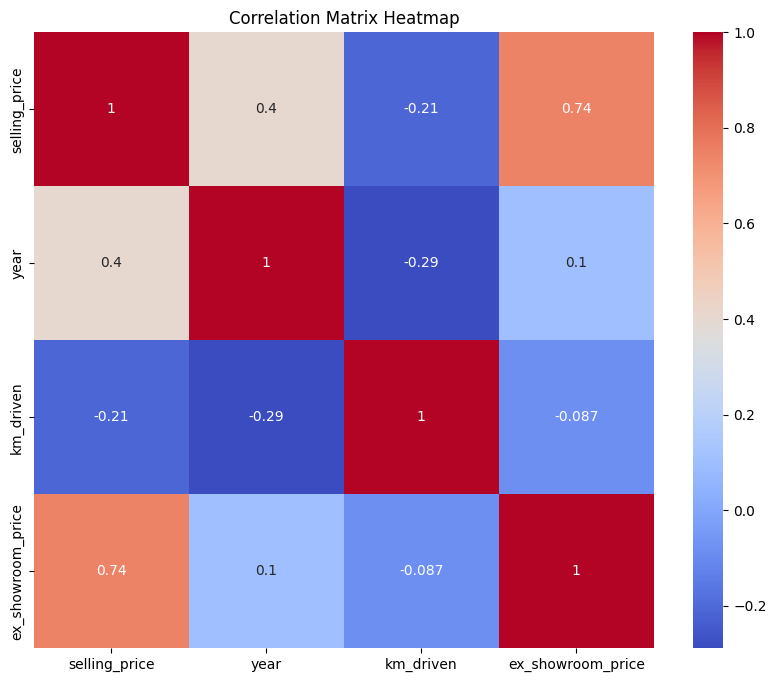

In [12]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',)
plt.title('Correlation Matrix Heatmap')
plt.show()


Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.

In [13]:

correlation_matrix = df_no_outliers.corr(numeric_only=True)

print("Correlation Matrix:\n")
print(correlation_matrix)

Correlation Matrix:

                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.389686  -0.403412           0.747030
year                    0.389686  1.000000  -0.462554           0.095939
km_driven              -0.403412 -0.462554   1.000000          -0.160169
ex_showroom_price       0.747030  0.095939  -0.160169           1.000000



Summary:

1. Important Factors Affecting Selling Price:
   - Year of Manufacture: Newer bikes tend to sell at higher prices.
   - Km Driven: Higher mileage generally reduces selling price.
   - Seller Type: Individual sellers achieve higher average prices than dealers.
   - Ownership: First-owner bikes are priced higher compared to second or third owner.

2. Data Cleaning and Feature Engineering:
   - Handled missing values in 'ex_showroom_price' by imputing with the median.
   - Removed unrealistic outliers in 'km_driven' using the IQR method.
   - Converted categorical columns (e.g., 'seller_type') into numeric format using one-hot encoding (for modeling).
   - Verified dataset consistency by checking for nulls and shape after cleaning.

Overall, selling price is influenced mainly by bike age, ownership status, and km driven.
